In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2xlZ29zZXMvTGlicmFyeS9DbG91ZFN0b3JhZ2UvT25lRHJpdmUtQllVLUlkYWhvL1BIMTM1L3RleHRib29rL2NoYXB0ZXJz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

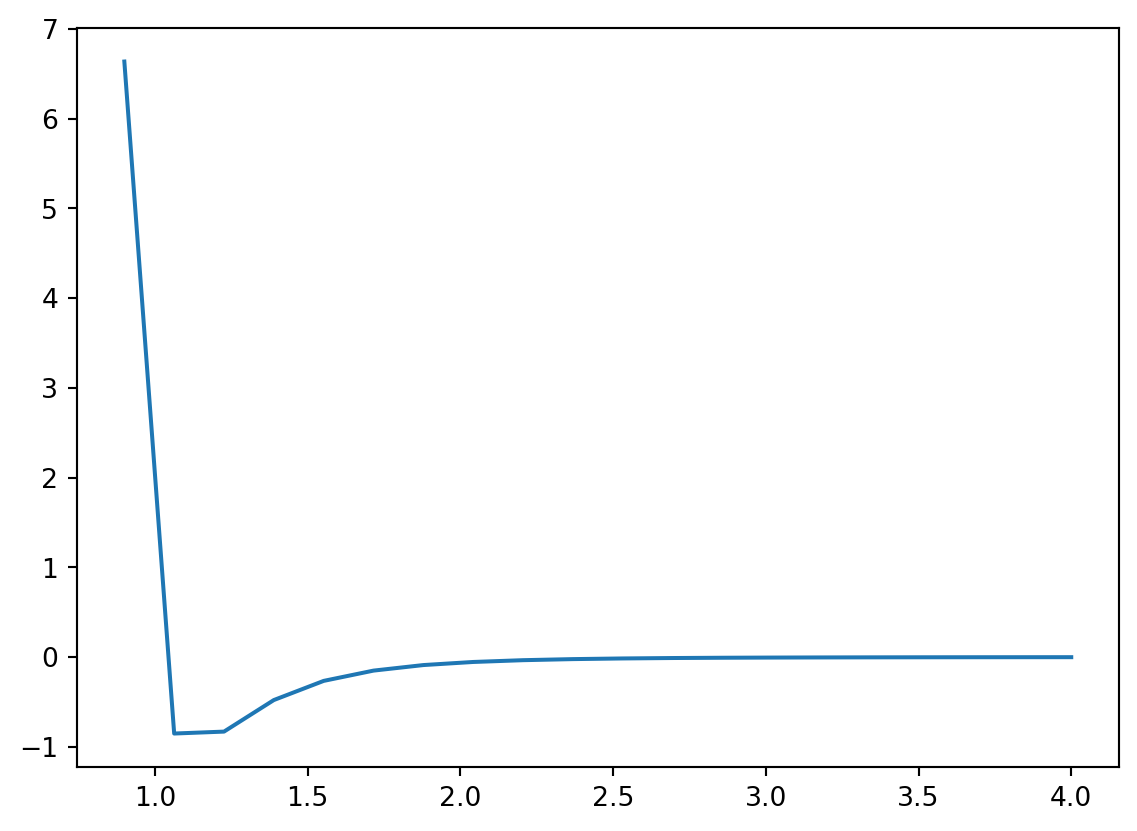

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import linspace,sqrt

sigma = 1
epsilon = 1
r = linspace(0.9,4,20)
energy = 4 * sigma* ((epsilon/r)**12 - (epsilon/r)**6)

plt.figure()
plt.plot(r,energy)

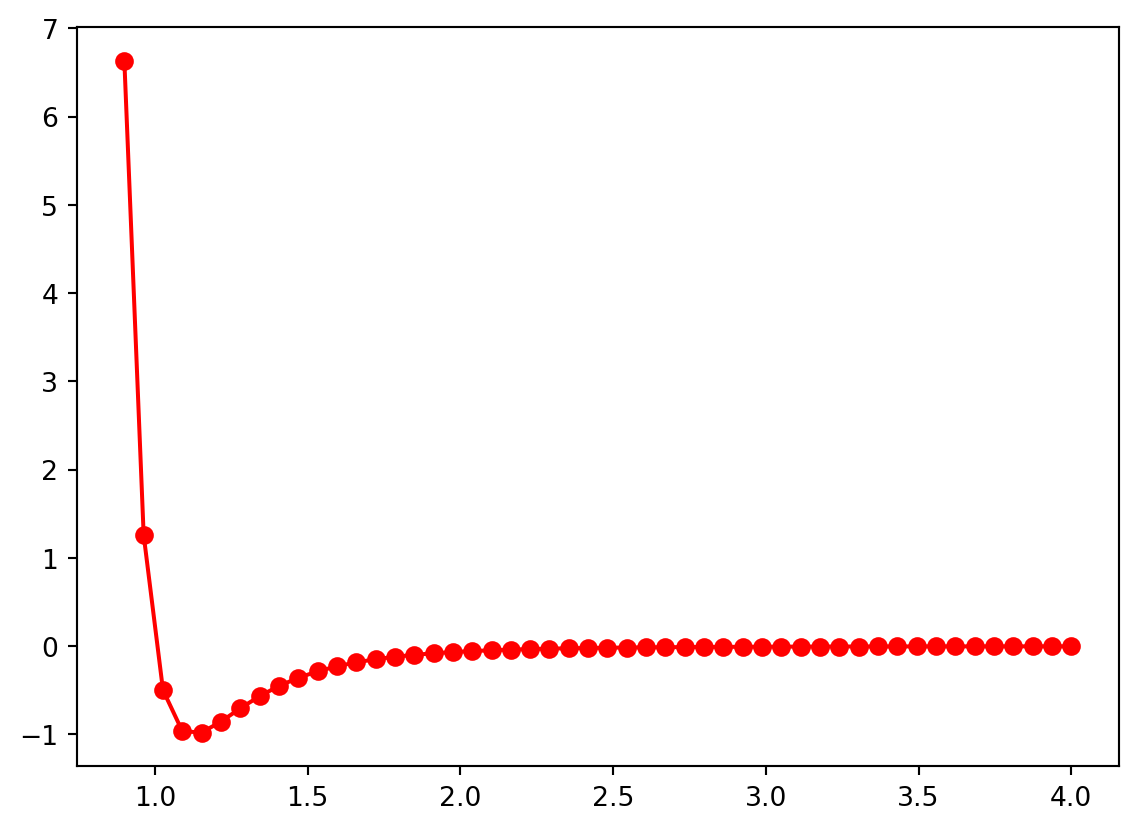

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import linspace,sqrt

r = linspace(0.9,4,50)
energy = 4 * ((1/r)**12 - (1/r)**6)

plt.figure()
plt.plot(r,energy,linestyle = '-', marker = 'o', color = 'r')

Text(0.5, 1.0, 'Lennard-Jones Potential')

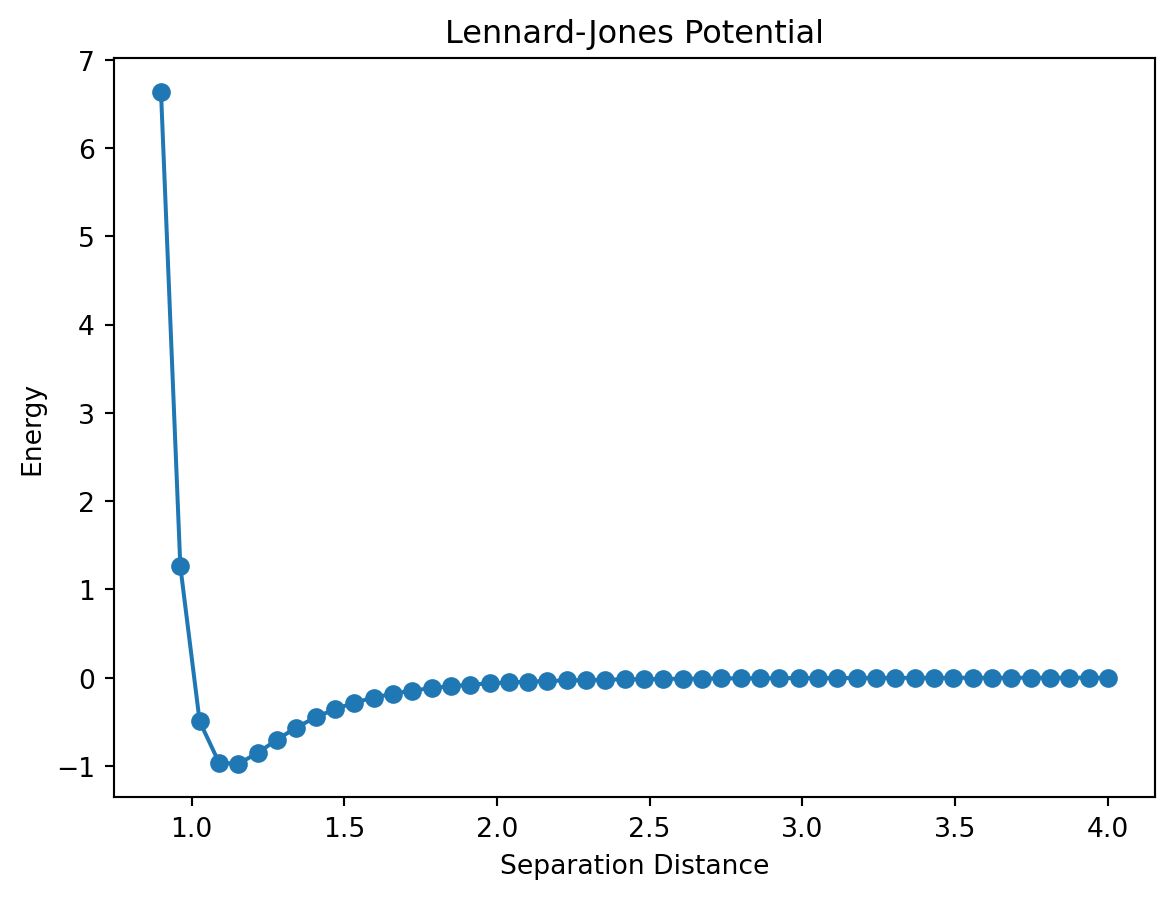

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import linspace,sqrt

r = linspace(0.9,4,50)
energy = 4 * ((1/r)**12 - (1/r)**6)

plt.figure()
plt.plot(r,energy,marker = 'o')
plt.xlabel("Separation Distance")
plt.ylabel("Energy")
plt.title("Lennard-Jones Potential")

Text(0.5, 1.0, 'Lennard-Jones Potential ($\\theta$)')

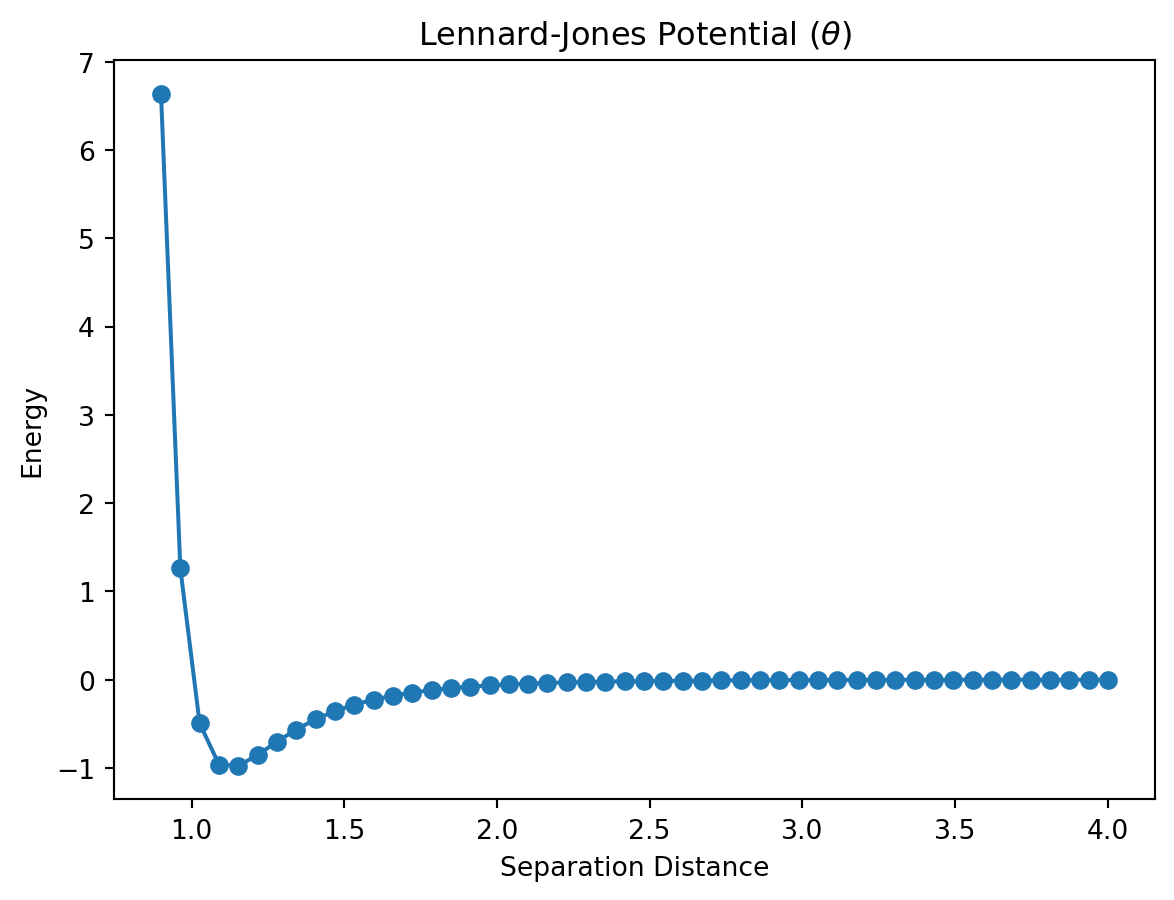

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import linspace,sqrt

r = linspace(0.9,4,50)
energy = 4 * ((1/r)**12 - (1/r)**6)

plt.figure()
plt.plot(r,energy,marker = 'o')
plt.xlabel("Separation Distance")
plt.ylabel("Energy")
plt.title(r"Lennard-Jones Potential ($\theta$)")

Text(0.5, 1.0, 'Lennard-Jones Potential')

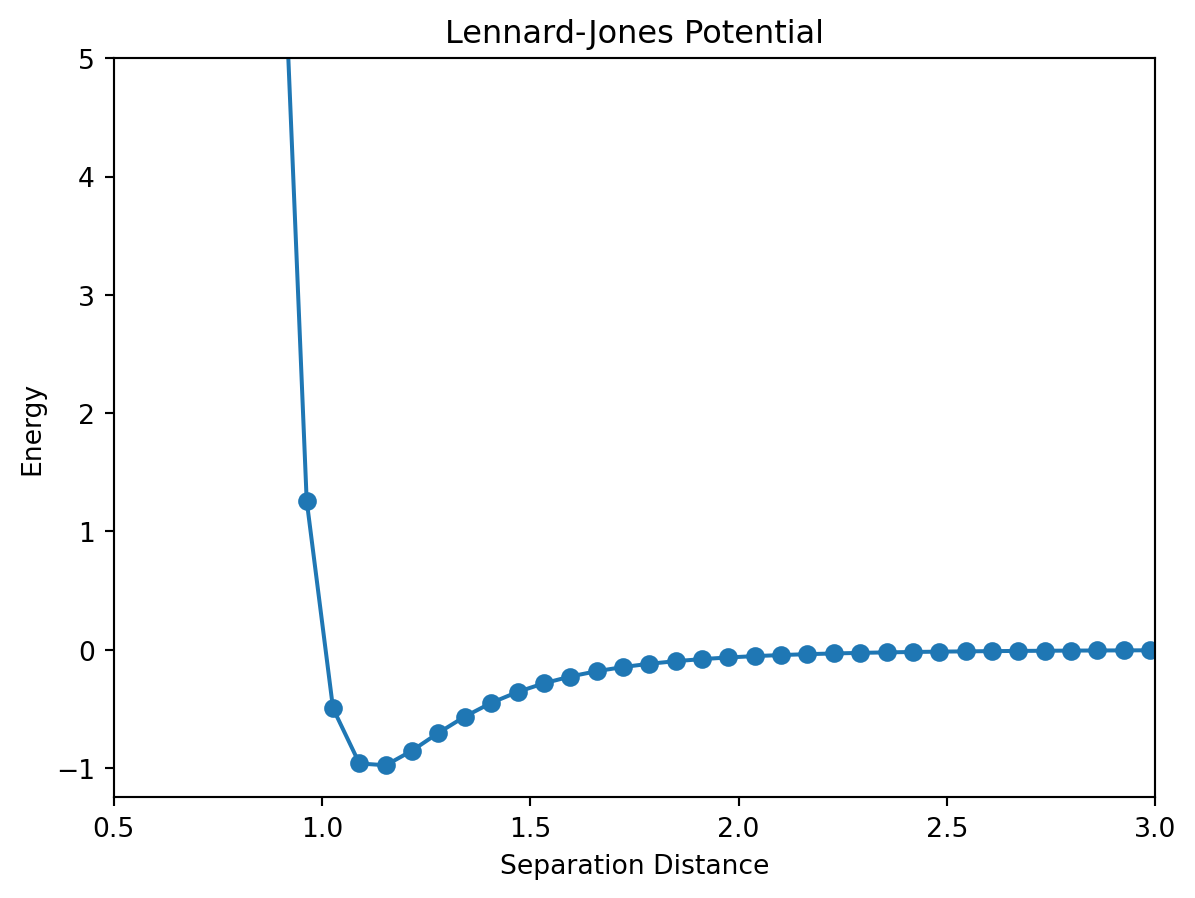

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import linspace,sqrt

r = linspace(0.9,4,50)
energy = 4 * ((1/r)**12 - (1/r)**6)

plt.figure()
plt.plot(r,energy,marker = 'o')
plt.xlim(0.5,3)
plt.ylim(-1.25,5)
plt.xlabel("Separation Distance")
plt.ylabel("Energy")
plt.title("Lennard-Jones Potential")

Text(0.5, 1.0, 'Lennard-Jones Potential')

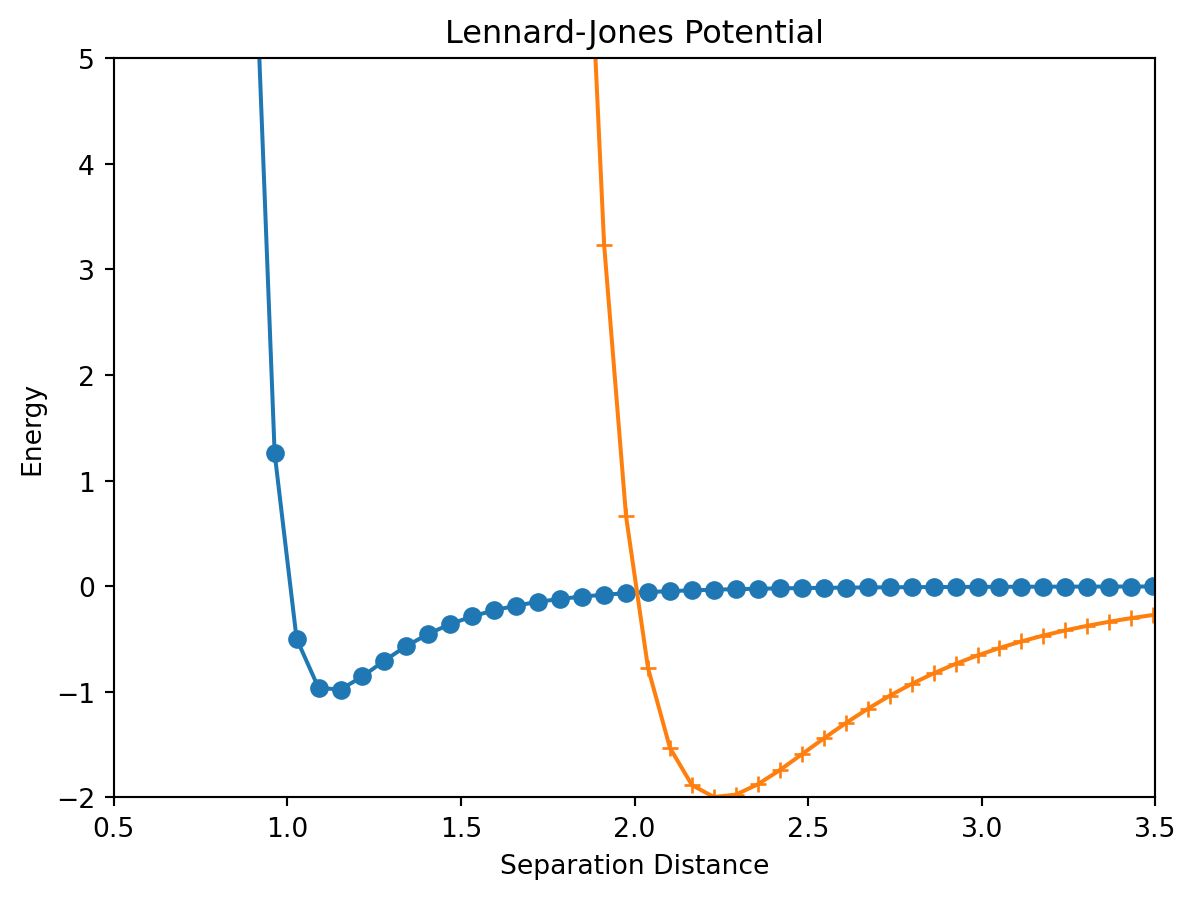

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import linspace,sqrt

r = linspace(0.9,4,50)

sigmaOne = 1
epsilonOne = 1
sigmaTwo = 2
epsilonTwo = 2
energyOne = 4 * sigmaOne* ((epsilonOne/r)**12 - (epsilonOne/r)**6)
energyTwo = 4 * sigmaTwo * ((epsilonTwo/r)**12 - (epsilonTwo/r)**6)

plt.figure()
plt.plot(r,energyOne,marker = 'o')
plt.plot(r,energyTwo,marker = '+')
plt.xlim(0.5,3.5)
plt.ylim(-2,5)
plt.xlabel("Separation Distance")
plt.ylabel("Energy")
plt.title("Lennard-Jones Potential")

Text(0.5, 1.0, 'Lennard-Jones Potential')

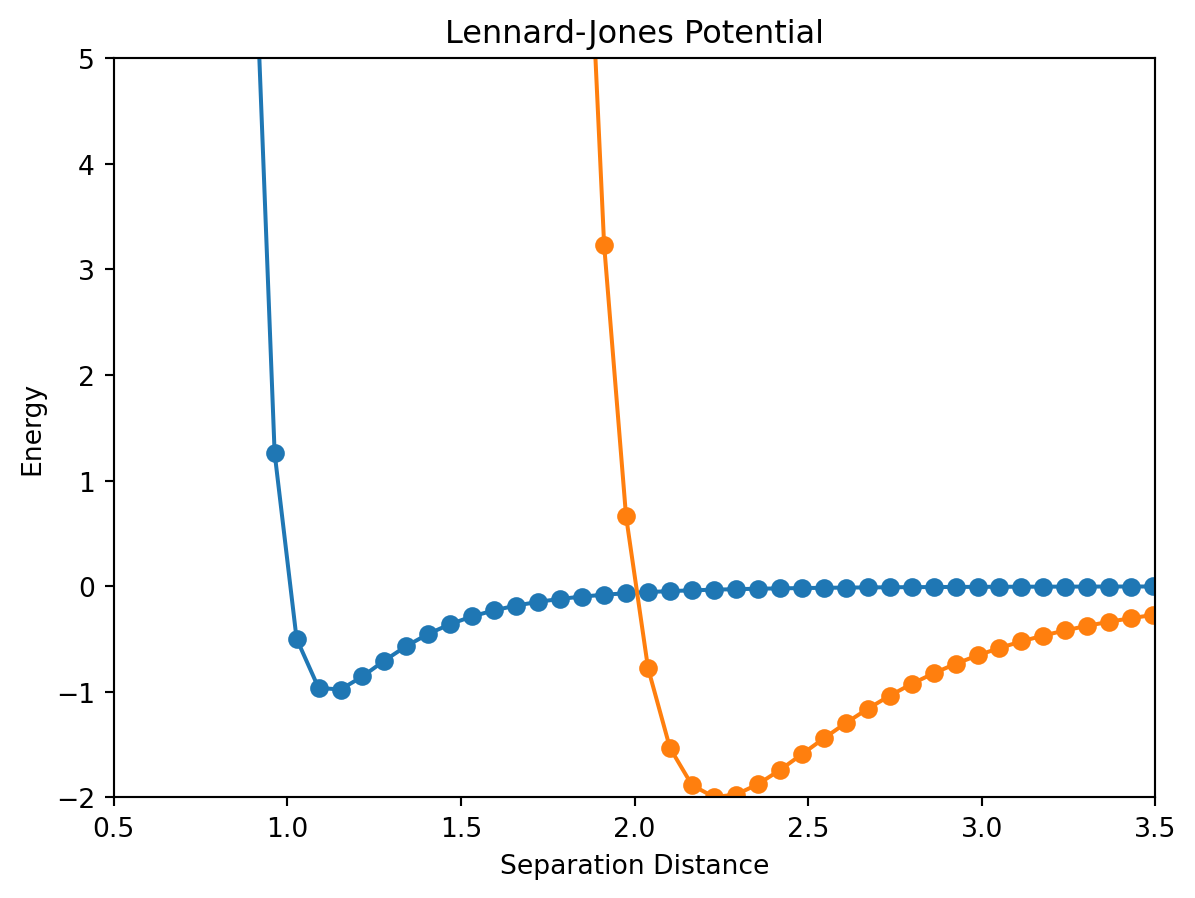

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import linspace,sqrt

r = linspace(0.9,4,50)

sigmaOne = 1
epsilonOne = 1
sigmaTwo = 2
epsilonTwo = 2
energyOne = 4 * sigmaOne* ((epsilonOne/r)**12 - (epsilonOne/r)**6)
energyTwo = 4 * sigmaTwo * ((epsilonTwo/r)**12 - (epsilonTwo/r)**6)

plt.figure()
plt.plot(r,energyOne,r,energyTwo,marker = 'o')
plt.xlim(0.5,3.5)
plt.ylim(-2,5)
plt.xlabel("Separation Distance")
plt.ylabel("Energy")
plt.title("Lennard-Jones Potential")

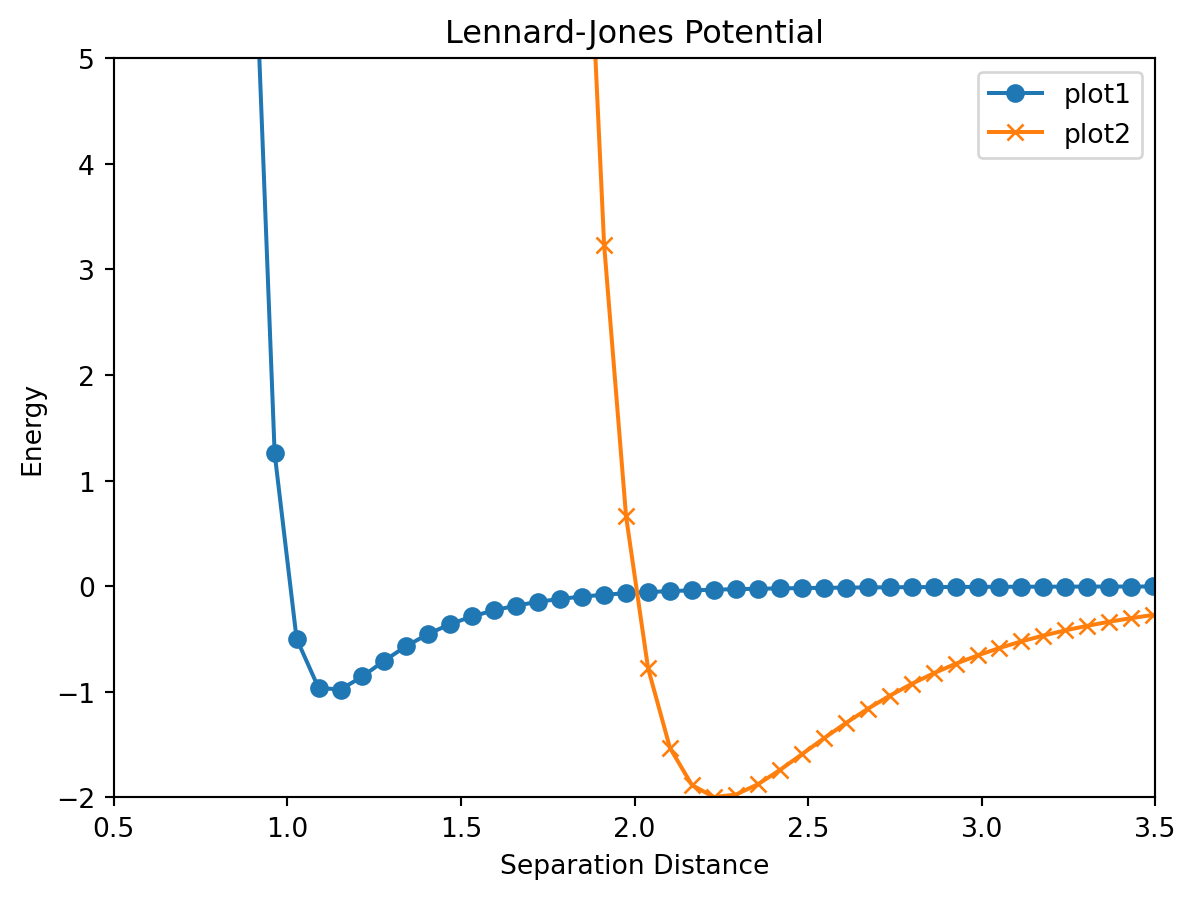

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import linspace,sqrt

r = linspace(0.9,4,50)

sigmaOne = 1
epsilonOne = 1
sigmaTwo = 2
epsilonTwo = 2
energyOne = 4 * sigmaOne* ((epsilonOne/r)**12 - (epsilonOne/r)**6)
energyTwo = 4 * sigmaTwo * ((epsilonTwo/r)**12 - (epsilonTwo/r)**6)

plt.figure()
plt.plot(r,energyOne,marker = 'o',label = "plot1")
plt.plot(r,energyTwo,marker = 'x',label = "plot2")
plt.xlim(0.5,3.5)
plt.ylim(-2,5)
plt.xlabel("Separation Distance")
plt.ylabel("Energy")
plt.title("Lennard-Jones Potential")
plt.legend()

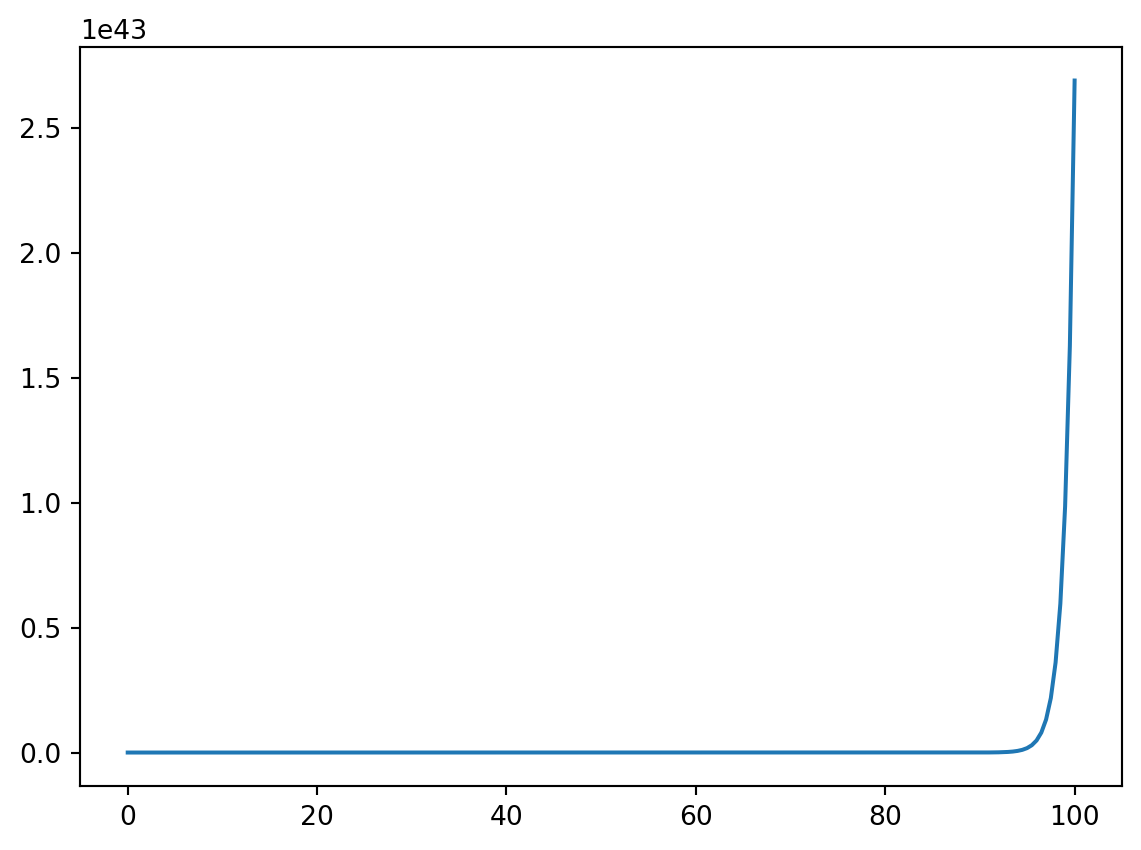

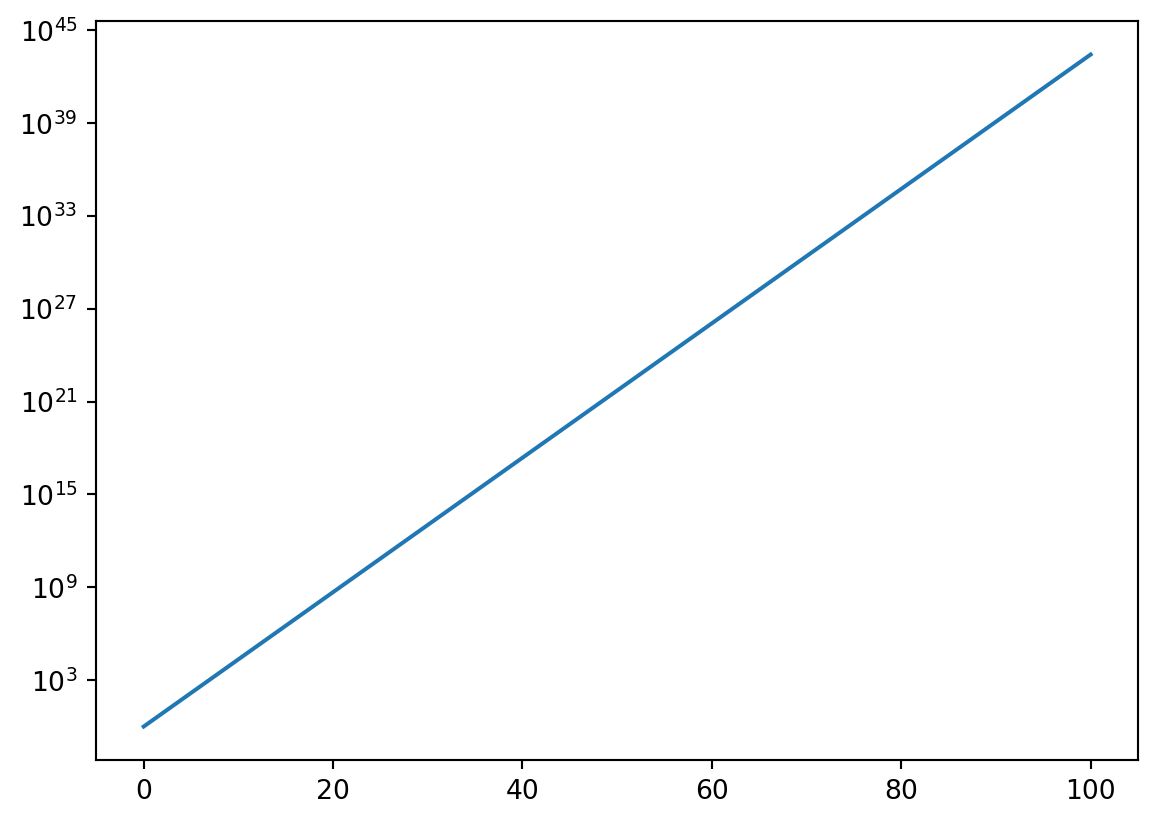

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import linspace,exp

x = linspace(0,100,200)
y = exp(x)

plt.figure()
plt.plot(x,y)
plt.figure() 
plt.semilogy(x,y)

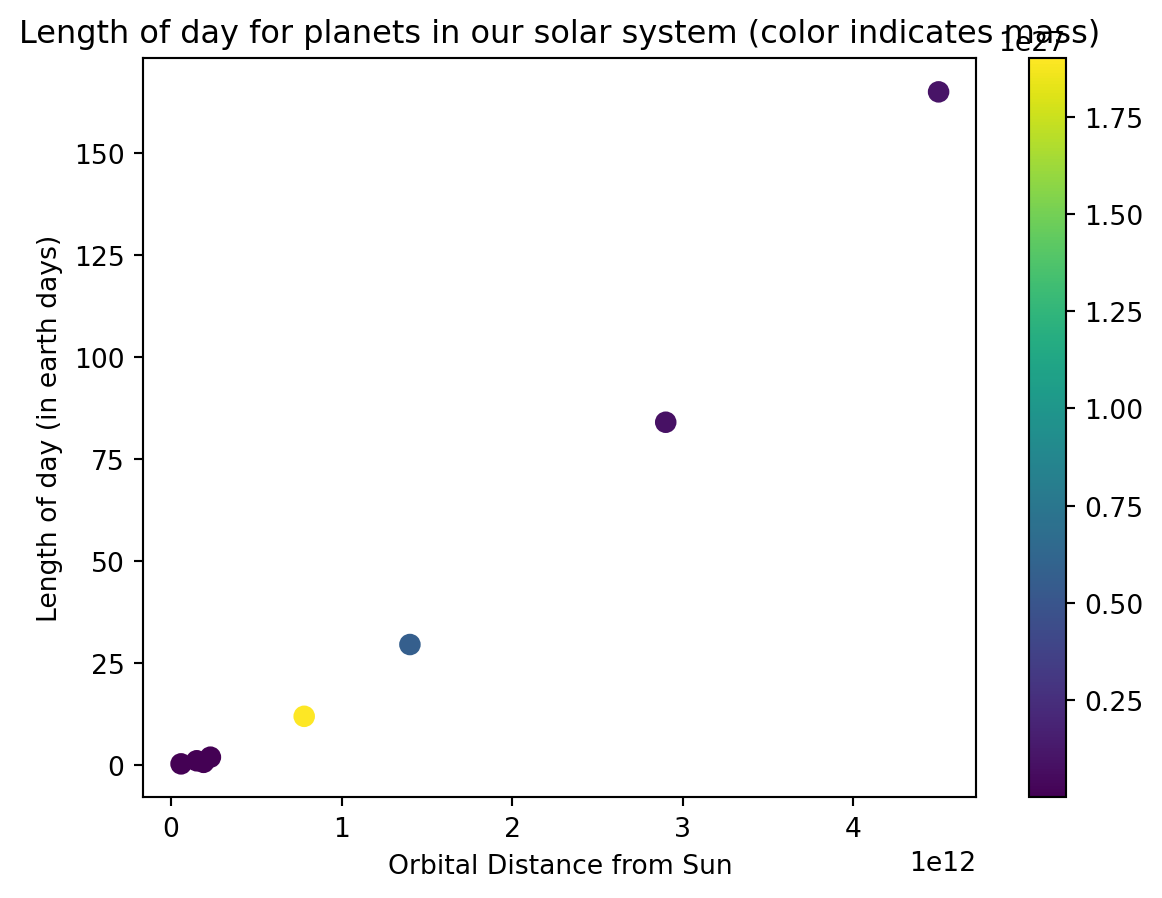

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import linspace,log

d = [5.8e10,1.9e11,1.5e11,2.3e11,7.8e11,1.4e12,2.9e12,4.5e12]
#d = [1,2,3,4,5,6,7,8]
T = [0.241,0.615,1,1.88,11.9,29.5,84,165]
mass = [3.2e23,4.9e24,6e24,6.4e23,1.9e27,5.7e26,8.7e25,1e26]

plt.figure()
plt.scatter(d,T,c = mass,s= 50)
plt.xlabel("Orbital Distance from Sun")
plt.ylabel("Length of day (in earth days)")
plt.title("Length of day for planets in our solar system (color indicates mass)")
plt.colorbar()

Text(0.5, 1.0, 'Length of day for planets in our solar system')

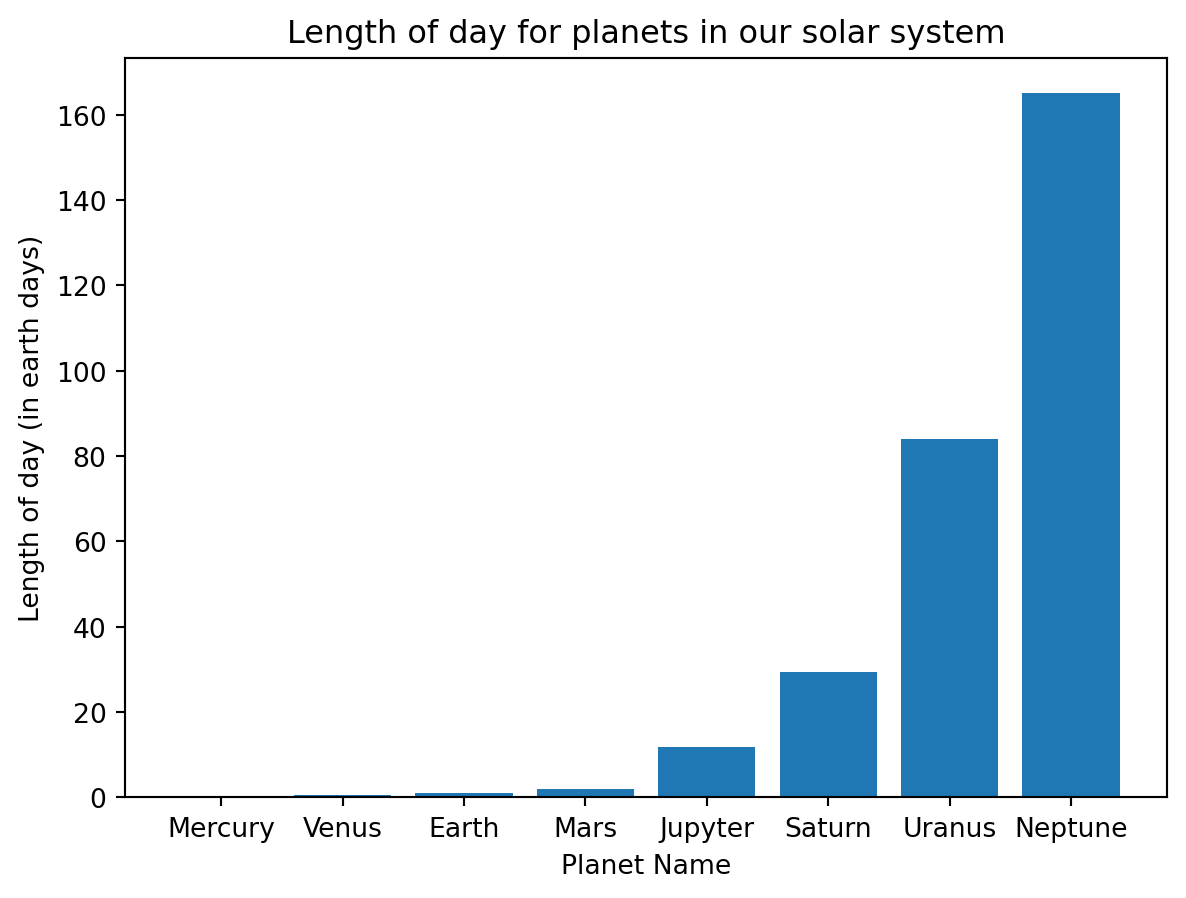

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import linspace,sqrt

#d = [5.8e10,1.9e11,1.5e11,2.3e11,7.8e11,1.4e12,2.9e12,4.5e12]
d = [1,2,3,4,5,6,7,8]
T = [0.241,0.615,1,1.88,11.9,29.5,84,165]

plt.figure()
plt.bar(d,T,tick_label = ["Mercury","Venus","Earth","Mars","Jupyter","Saturn","Uranus","Neptune"])
plt.xlabel("Planet Name")
plt.ylabel("Length of day (in earth days)")
plt.title("Length of day for planets in our solar system")

<ErrorbarContainer object of 3 artists>

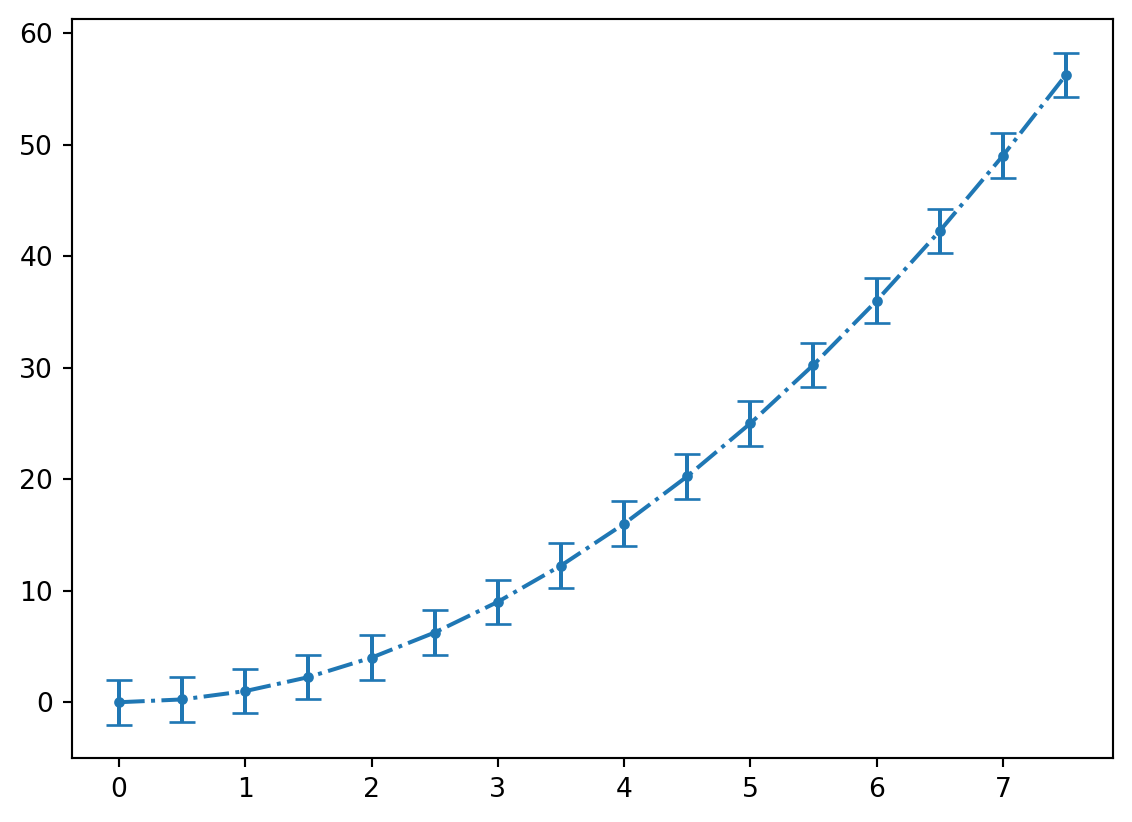

In [14]:
from matplotlib import pyplot as plt

from numpy import arange

x = arange(0,8,0.5)
y = x**2

x_err = 0.05 # Same error for all points
y_error = 2 # Different error for each point

plt.errorbar(x,y,linestyle = '-.', marker = 'o',markersize = 3,yerr=y_error,capsize = 5)

Text(0.5, 1.0, 'Histogram of Material Densities (g/cm$^3$)')

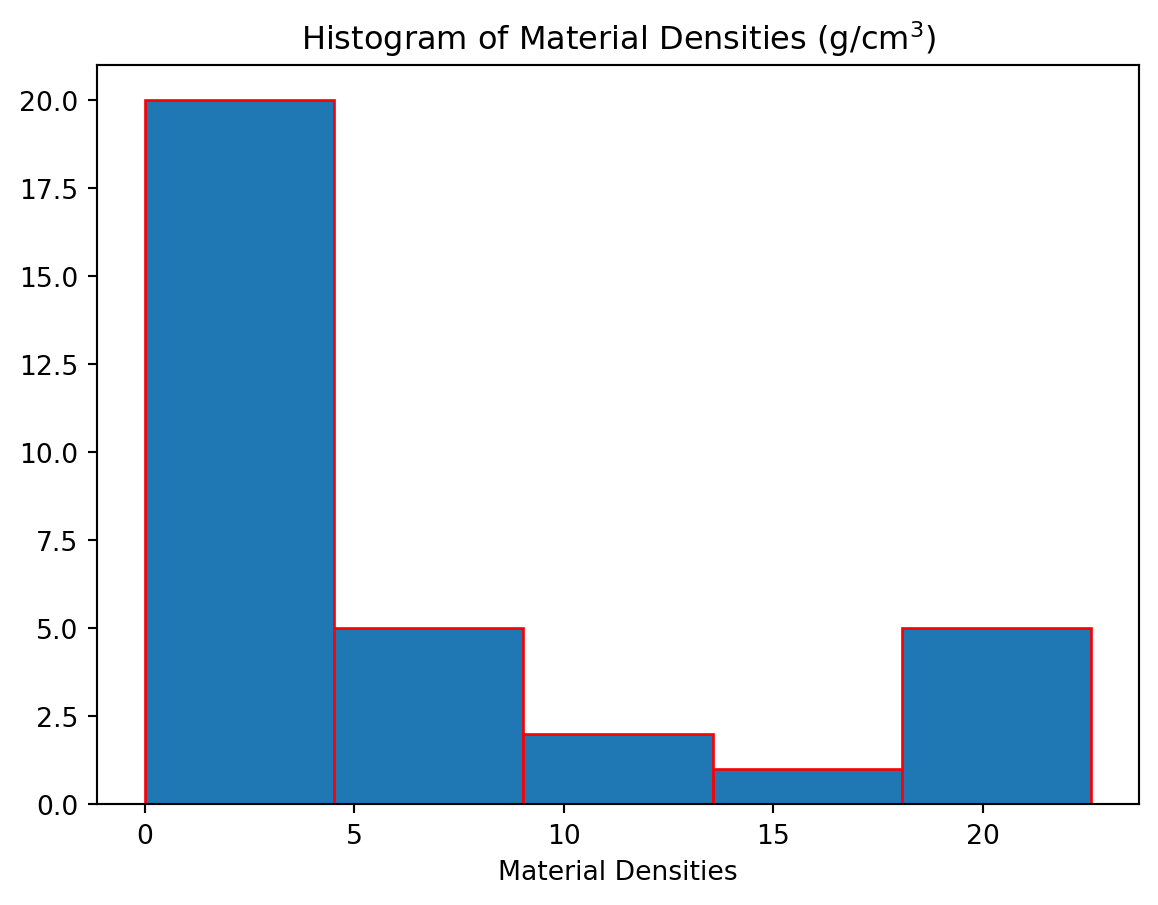

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import linspace,log

densities = [0.00009,0.000178,0.00125,0.001251,0.001293,0.001977,0.534,0.810,0.900,0.920,0.998,1.000,1.03,1.03,1.25,1.600,1.7,2.6,2.7,3.5,5.515,7.8,7.8,8.6,8.5,11.3,13,13.6,18.7,19.3,21.4,22.4,22.6]

plt.figure()
plt.hist(densities,bins = 5,edgecolor = 'r')
plt.xlabel("Material Densities")
plt.title(r"Histogram of Material Densities (g/cm$^3$)")

Text(0.5, 1.0, 'Histogram of Material Densities (g/cm$^3$)')

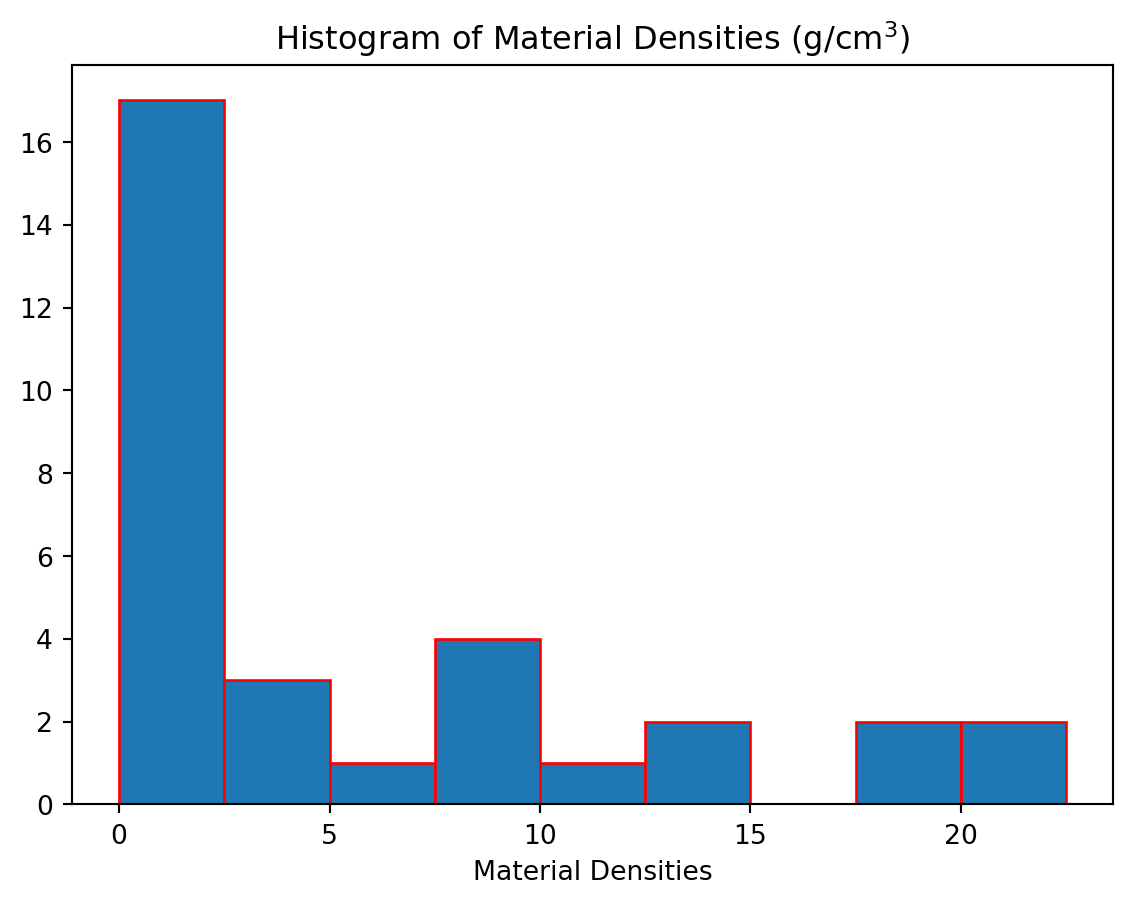

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import linspace,log

densities = [0.00009,0.000178,0.00125,0.001251,0.001293,0.001977,0.534,0.810,0.900,0.920,0.998,1.000,1.03,1.03,1.25,1.600,1.7,2.6,2.7,3.5,5.515,7.8,7.8,8.6,8.5,11.3,13,13.6,18.7,19.3,21.4,22.4,22.6]

plt.figure()
plt.hist(densities,bins = [0,2.5,5,7.5,10,12.5,15,17.5,20,22.5],edgecolor = 'r')
plt.xlabel("Material Densities")
plt.title(r"Histogram of Material Densities (g/cm$^3$)")

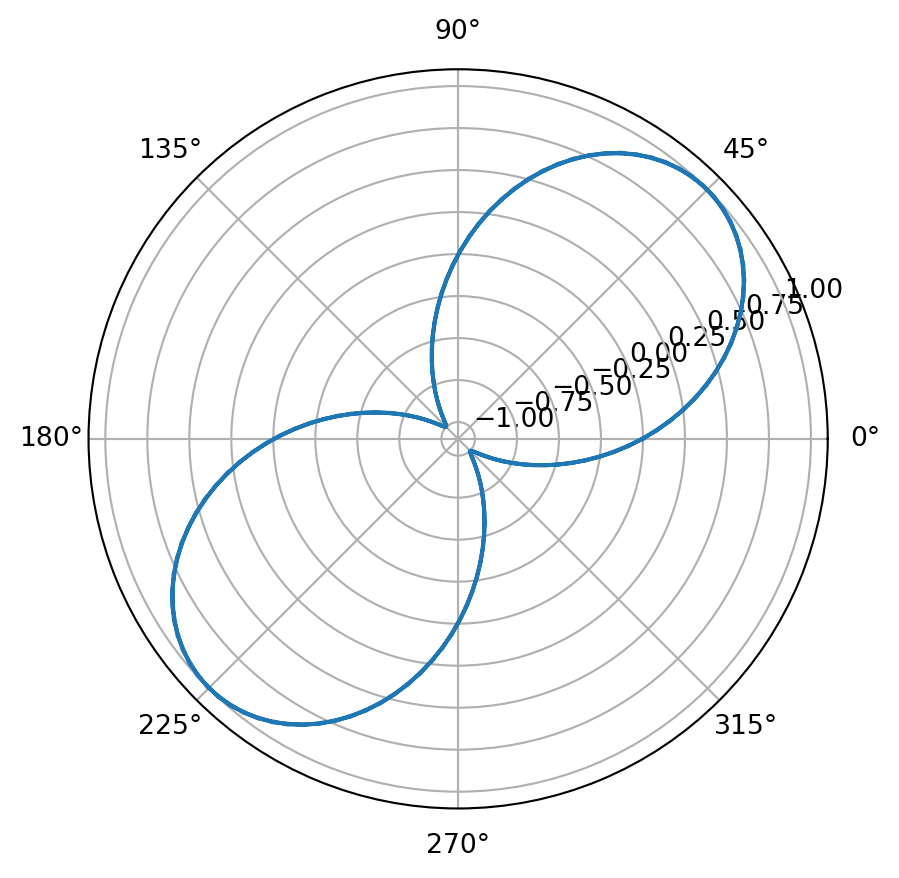

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import linspace,pi,sin

theta = linspace(0,4 * pi,150)
r = sin(2* theta)

plt.figure()
plt.polar(theta,r)

Text(0.5, 1.0, 'Lennard-Jones Potential')

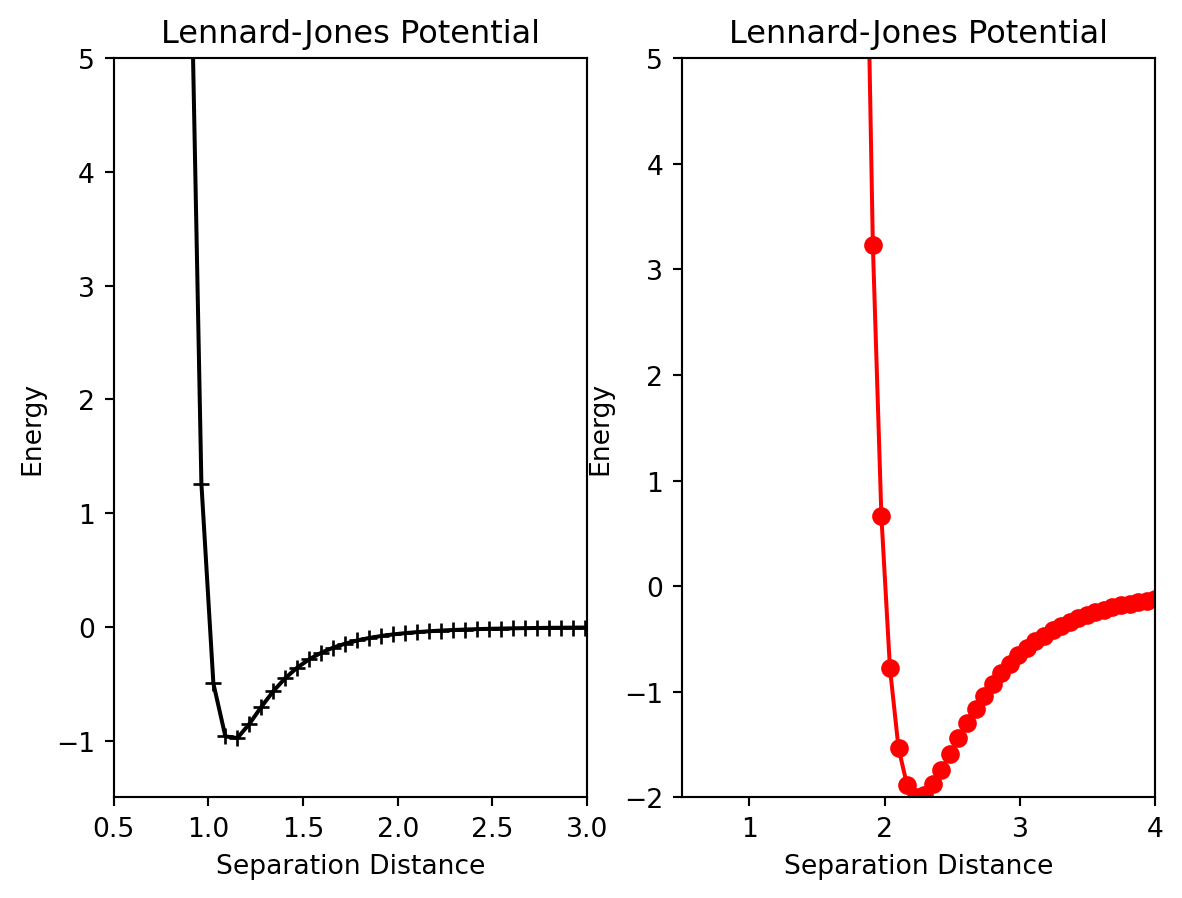

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import linspace,sqrt

r = linspace(0.9,4,50)

sigmaOne = 1
epsilonOne = 1
sigmaTwo = 2
epsilonTwo = 2
energyOne = 4 * sigmaOne* ((epsilonOne/r)**12 - (epsilonOne/r)**6)
energyTwo = 4 * sigmaTwo * ((epsilonTwo/r)**12 - (epsilonTwo/r)**6)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(r,energyOne,marker = '+',color = 'k')
ax1.set_xlim(0.5,3.0)
ax1.set_ylim(-1.5,5)
ax1.set_xlabel("Separation Distance")
ax1.set_ylabel("Energy")
ax1.set_title("Lennard-Jones Potential")

ax2.plot(r,energyTwo,marker = 'o',color = 'r')
ax2.set_xlim(0.5,4.0)
ax2.set_ylim(-2,5)
ax2.set_xlabel("Separation Distance")
ax2.set_ylabel("Energy")
ax2.set_title("Lennard-Jones Potential")

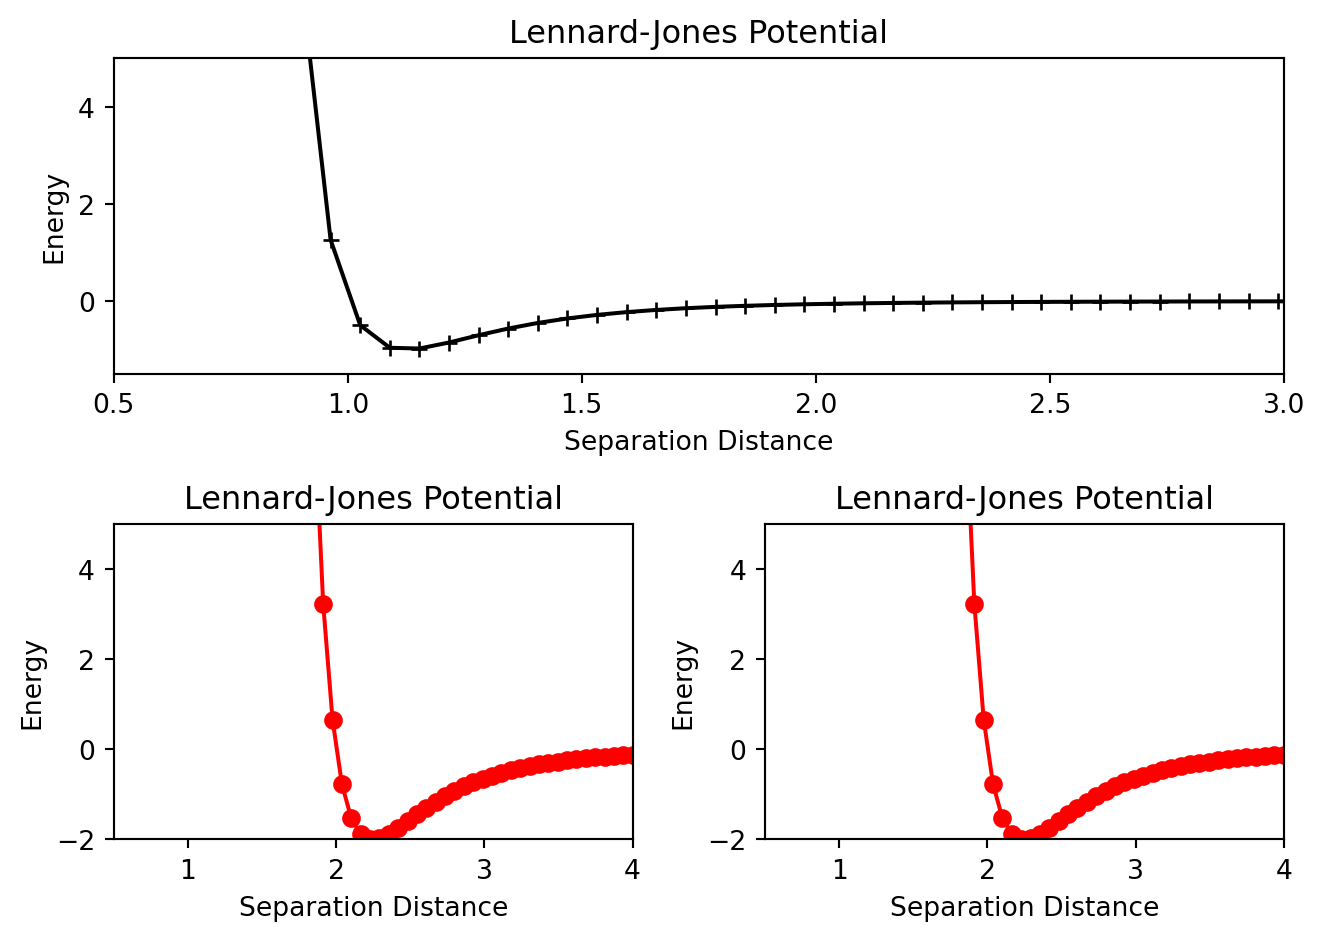

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import linspace,sqrt

r = linspace(0.9,4,50)

sigmaOne = 1
epsilonOne = 1
sigmaTwo = 2
epsilonTwo = 2
energyOne = 4 * sigmaOne* ((epsilonOne/r)**12 - (epsilonOne/r)**6)
energyTwo = 4 * sigmaTwo * ((epsilonTwo/r)**12 - (epsilonTwo/r)**6)

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2= fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

ax1.plot(r,energyOne,marker = '+',color = 'k')
ax1.set_xlim(0.5,3.0)
ax1.set_ylim(-1.5,5)
ax1.set_xlabel("Separation Distance")
ax1.set_ylabel("Energy")
ax1.set_title("Lennard-Jones Potential")

ax2.plot(r,energyTwo,marker = 'o',color = 'r')
ax2.set_xlim(0.5,4.0)
ax2.set_ylim(-2,5)
ax2.set_xlabel("Separation Distance")
ax2.set_ylabel("Energy")
ax2.set_title("Lennard-Jones Potential")

ax3.plot(r,energyTwo,marker = 'o',color = 'r')
ax3.set_xlim(0.5,4.0)
ax3.set_ylim(-2,5)
ax3.set_xlabel("Separation Distance")
ax3.set_ylabel("Energy")
ax3.set_title("Lennard-Jones Potential")
plt.tight_layout()

In [20]:
# python code here

In [21]:
# Python code here

In [22]:
# Python code here

In [23]:
# Python code here

In [24]:
# Python code here

In [25]:
# Python code here